# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [ ]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.style
import matplotlib as mpl

## Challenge 1

#### The data we will use in this challenge is:

In [ ]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

In [ ]:
# Method 1
plt.plot(x,y, 'b+', x,z, 'ro')
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

In [ ]:
plt.subplots(nrows=1,ncols=2)

In [ ]:
_, (chart_1,chart_2) = plt.subplots(nrows=2,ncols=1)
chart_1.plot(x,y)
chart_2.plot(x,z)

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

In [ ]:
_, (chart_1,chart_2) = plt.subplots(nrows=2,ncols=1, figsize=(20,10))
chart_1.plot(x,y)
chart_2.plot(x,z)

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

# JOSE SAID NOT TO DO THIS 

#### As a bonus challenge, try to add a legend to the plot.

# JOSE SAID NOT TO DO THIS

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [ ]:
fitbit = pd.read_csv(r'C:\Users\Daniel Carvalho\Desktop\DataAnalysis\WEEK3\DAY4\labs\lab-matplotlib-seaborn\your-code\Fitbit2.csv')
fitbit.head()

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [ ]:
# MEDIAN STEPS BY MONTH_ENCODED
avg_steps = fitbit.groupby('Months_encoded').agg({'Steps':'mean'}).reset_index()
plt.plot(avg_steps)
# MEDIAN STEPS BY WORK_OR_WEEKEND
avg_steps = fitbit.groupby('Work_or_Weekend').agg({'Steps':'mean'}).reset_index()
plt.plot(avg_steps)

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [ ]:
x=[[fitbit['Minutes Lightly Active']],[fitbit['Minutes Very Active']],[fitbit['Minutes Sedentary']]]
y=[[fitbit['Steps']],[fitbit['Steps']],[fitbit['Steps']]]
for i in range(len(x)):
    plt.figure()
    plt.scatter(x[i],y[i])
 
    plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [ ]:
titanic = pd.read_csv(r'C:\Users\Daniel Carvalho\Desktop\DataAnalysis\WEEK3\DAY4\labs\lab-matplotlib-seaborn\your-code\titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [ ]:
titanic.dtypes

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [ ]:
only_numerical = titanic.select_dtypes(include=np.number)
only_numerical

In [ ]:
only_category = titanic.select_dtypes(exclude=np.number)
only_category

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [ ]:
plt.figure(figsize=(12,6))
mpl.style.use('classic')

#### Use the right visulalization to show the distribution of column `Age`.

In [ ]:
sns.boxplot(y='Age', data = titanic)
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

In [ ]:
plt.hist(titanic['Age'], edgecolor="red", bins=3)
plt.show()

#### How does the bin size affect your plot?

In [ ]:
#It pin points the age group with the most and least amount of passagers

#### Use seaborn to show the distribution of column `Age`.

In [ ]:
sns.boxplot(y='Age', data = titanic)
plt.show() 

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
a = titanic['Gender'].value_counts()
plt.pie(a)
plt.show()

#### Use the right plot to visualize the column `Pclass`.

In [ ]:
b = titanic['Pclass'].value_counts()
sns.boxplot(y=b, data = titanic)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [ ]:
sns.catplot(x='Age',y='Gender',hue='Age',data=titanic)
plt.show()

#### What does the last plot tell you about the feature `Age`?

In [ ]:
#Both female and male have similar age groups on the titanic

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [ ]:
#couldn't do this one.

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
new = titanic.filter(['Fare','Age'], axis=1)
correlation = new.corr()
plt.matshow(correlation)
plt.show()

In [ ]:
# Method 2 - seaborn
sns.heatmap(correlation)
plt.show()

#### Plot the correlation matrix using seaborn.

In [ ]:
sns.pairplot(titanic)
plt.show()

#### What are the most correlated features?

In [ ]:
#Age and passanger Id

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
sns.catplot(x='Age',y='Pclass',hue='Pclass',data=titanic)
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

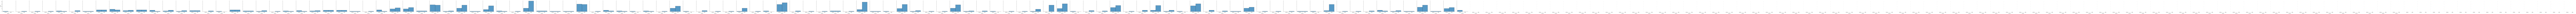

In [7]:
g = sns.FacetGrid(titanic, col="Age")
g.map(sns.histplot, "Gender")